# Stroke Classification Models

## 1. Firstly the necessary libraries are loaded including pandas, scipy and matplotlib

In [31]:
import pydot
import joblib
import graphviz
import matplotlib
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

print("The libraries were successfully loaded!")

The libraries were successfully loaded!


## 2. The cleansed dataset is loaded from a csv

In [32]:
# load the training dataset
df_stroke = pd.read_csv('data/cleansed-healthcare-dataset-stroke-data.csv',delimiter=',',header='infer')
df_stroke.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       1  80.0             0              1             1          2   
2       0  49.0             0              0             1          2   
3       0  79.0             1              0             1          3   
4       1  81.0             0              0             1          2   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             105.92  32.5               2       1  
2               1             171.23  34.4               3       1  
3               0             174.12  24.0               2       1  
4               1             186.21  29.0               1       1

## 3. The features in the dataset are seperated from the label and print the values of the first 4 patients

In [33]:
# Separate features and labels
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
label = 'stroke'
X, y = df_stroke[features].values, df_stroke[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [1.0, 67.0, 0.0, 1.0, 1.0, 2.0, 1.0, 228.69, 36.6, 1.0] 
  Label: 1
Patient 2 
  Features: [1.0, 80.0, 0.0, 1.0, 1.0, 2.0, 0.0, 105.92, 32.5, 2.0] 
  Label: 1
Patient 3 
  Features: [0.0, 49.0, 0.0, 0.0, 1.0, 2.0, 1.0, 171.23, 34.4, 3.0] 
  Label: 1
Patient 4 
  Features: [0.0, 79.0, 1.0, 0.0, 1.0, 3.0, 0.0, 174.12, 24.0, 2.0] 
  Label: 1


## 4. The dataset is split into a training and testing dataset

In [34]:
# Separate features and labels
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
label = 'stroke'
X, y = df_stroke[features].values, df_stroke[label].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.size, X_test.size))

Training cases: 34360
Test cases: 14730


## 5. A function to train and test the models

In [35]:
# function
def machine_learning_function(model):
    # Train the model
    model = model.fit(X_train, y_train)
    # Get predictions from test data
    predictions = model.predict(X_test)

    # calculate ROC curve
    y_scores = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
    
    # Print the classification report
    print("Classification Report")
    print(classification_report(y_test, predictions))

    # Get evaluation metrics
    cm = confusion_matrix(y_test, predictions)
    cm_results = [accuracy_score(y_test, predictions), precision_score(y_test, predictions), recall_score(y_test, predictions), roc_auc_score(y_test,y_scores[:,1])]
    print ('Confusion Matrix:\n',cm, '\n')
    print('Accuracy:', cm_results[0])
    print("Overall Precision:",cm_results[1])
    print("Overall Recall:",cm_results[2])
    print('AUC: ' + str(cm_results[3]))

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    # Plot the diagonal 50% line
    plt.plot([0, 1], [0, 1], 'k--')
    # Plot the FPR and TPR achieved by our model
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    # K-fold Cross Validation
    X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5, random_state=0)
    cv = cross_val_score(model, X, y, cv=10)
    print('\nMean Cross Validation')
    print(cv.mean())
    print('\nCross Validation Standard Deviation')
    print(cv.std())
    print('\nCross Validation')
    print(cv)
    return((model, cv, cm_results))

## 6. Pre-Optimised Logistic Regression Model

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1418
           1       1.00      0.02      0.04        55

    accuracy                           0.96      1473
   macro avg       0.98      0.51      0.51      1473
weighted avg       0.96      0.96      0.95      1473

Confusion Matrix:
 [[1418    0]
 [  54    1]] 

Accuracy: 0.9633401221995926
Overall Precision: 1.0
Overall Recall: 0.01818181818181818
AUC: 0.8420310296191819


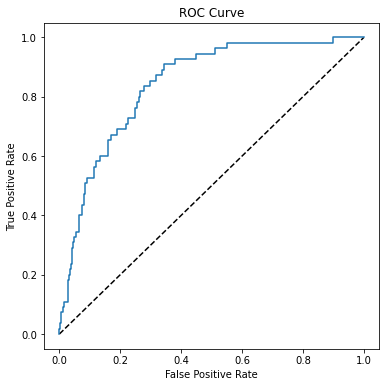


Mean Cross Validation
0.9574254956565111

Cross Validation Standard Deviation
0.0010830799419457816

Cross Validation
[0.95723014 0.95723014 0.95723014 0.95723014 0.95723014 0.95723014
 0.95519348 0.95723014 0.9592668  0.95918367]

 Coefficients
[[ 0.00794659  0.06856376  0.59009387  0.25251926 -0.031638   -0.04448845
   0.20735426  0.00490199  0.00180506  0.20576283]]

 Intercept
[-8.0426303]


['./models/logistic_regression_stroke_model.pkl']

In [36]:
pre_op_lr_model, pre_op_lr_cv, pre_op_lr_cm_results = machine_learning_function(LogisticRegression(C=1/0.01, solver="liblinear", random_state=0))
print('\n Coefficients')
print(pre_op_lr_model.coef_)
print('\n Intercept')
print(pre_op_lr_model.intercept_)

# Save the model as a pickle file
filename = './models/logistic_regression_stroke_model.pkl'
joblib.dump(pre_op_lr_model, filename)

## 7. Pre-Optimised Random Forest Model

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1418
           1       1.00      0.02      0.04        55

    accuracy                           0.96      1473
   macro avg       0.98      0.51      0.51      1473
weighted avg       0.96      0.96      0.95      1473

Confusion Matrix:
 [[1418    0]
 [  54    1]] 

Accuracy: 0.9633401221995926
Overall Precision: 1.0
Overall Recall: 0.01818181818181818
AUC: 0.8091037312475958


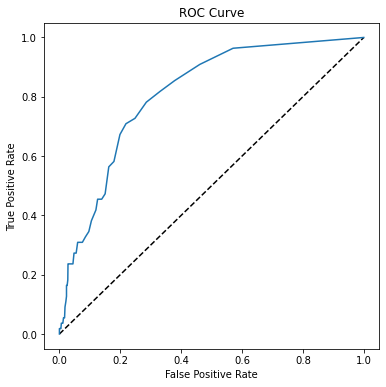


Mean Cross Validation
0.957017748036078

Cross Validation Standard Deviation
0.0016909284013759802

Cross Validation
[0.95723014 0.95519348 0.95723014 0.9592668  0.95723014 0.9592668
 0.95315682 0.95723014 0.95723014 0.95714286]


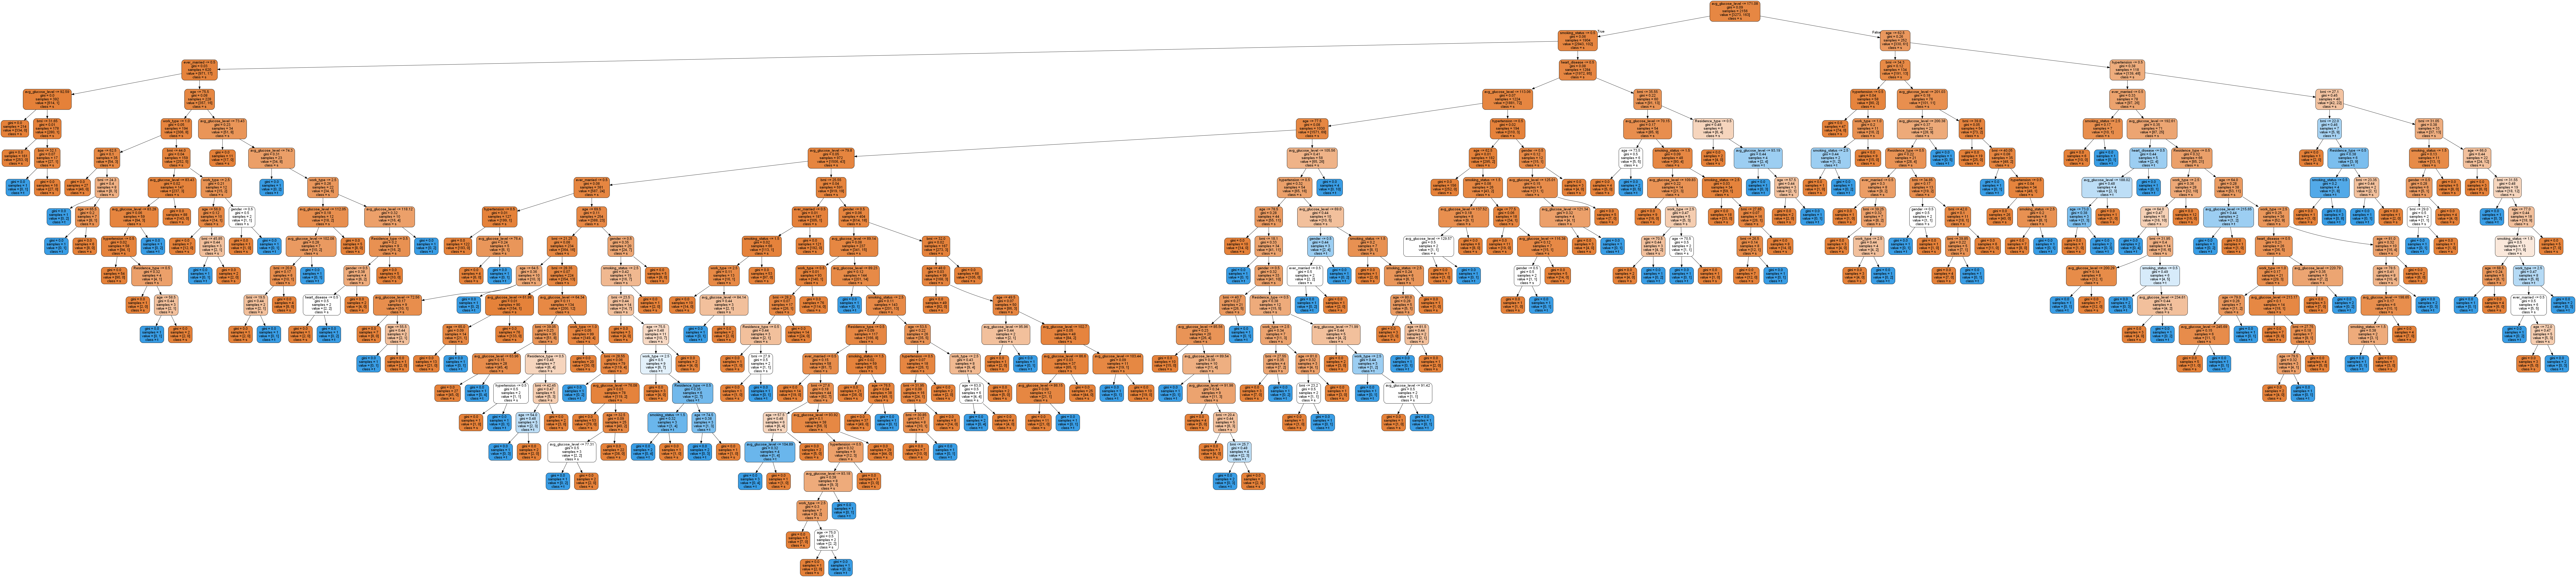

In [37]:
pre_op_rf_model, pre_op_rf_cv, pre_op_rf_cm_results = machine_learning_function(RandomForestClassifier(random_state=0))
estimator = pre_op_rf_model.estimators_[1]

# Export tree as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = features,
                class_names = label,
                #label='root',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert dot file to png
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

# Save the model as a pickle file
filename = './models/random_forest_stroke_model.pkl'
joblib.dump(pre_op_rf_model, filename)

# Display in jupyter notebook
Image(filename = 'tree.png')

## 8. Pre-Optimised KNN Model

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1418
           1       0.10      0.02      0.03        55

    accuracy                           0.96      1473
   macro avg       0.53      0.51      0.50      1473
weighted avg       0.93      0.96      0.94      1473

Confusion Matrix:
 [[1409    9]
 [  54    1]] 

Accuracy: 0.9572301425661914
Overall Precision: 0.1
Overall Recall: 0.01818181818181818
AUC: 0.6570457750993717


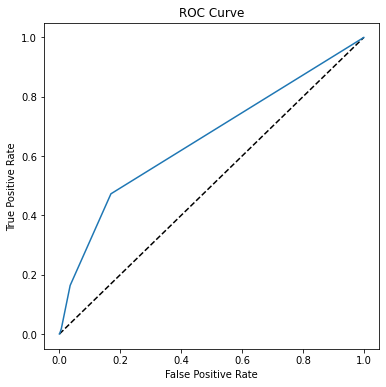


Mean Cross Validation
0.951720769774305

Cross Validation Standard Deviation
0.002595043239755311

Cross Validation
[0.94704684 0.95315682 0.95315682 0.95519348 0.95519348 0.95112016
 0.95315682 0.95112016 0.9490835  0.94897959]


['./models/knn_stroke_model.pkl']

In [38]:
pre_op_knn_model, pre_op_knn_cv, pre_op_knn_cm_results = machine_learning_function(neighbors.KNeighborsClassifier(n_neighbors=5))

# Save the model as a pickle file
filename = './models/knn_stroke_model.pkl'
joblib.dump(pre_op_knn_model, filename)

## 9. Pre-Optimised SVC Model

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1418
           1       0.00      0.00      0.00        55

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.93      0.96      0.94      1473

Confusion Matrix:
 [[1418    0]
 [  55    0]] 

Accuracy: 0.9626612355736592
Overall Precision: 0.0
Overall Recall: 0.0
AUC: 0.7606231568149763


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\

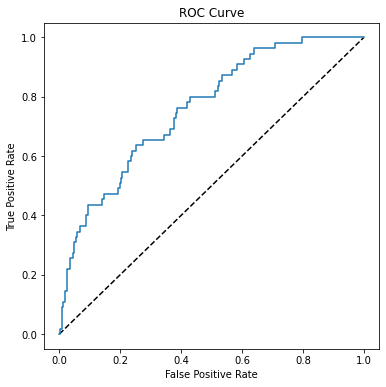


Mean Cross Validation
0.9574254956565111

Cross Validation Standard Deviation
0.0005860592709588829

Cross Validation
[0.95723014 0.95723014 0.95723014 0.95723014 0.95723014 0.95723014
 0.95723014 0.95723014 0.95723014 0.95918367]


['./models/svc_stroke_model.pkl']

In [39]:
pre_op_svc_model, pre_op_svc_cv, pre_op_svc_cm_results = machine_learning_function(SVC(random_state=0, kernel = 'linear', probability=True))

# Save the model as a pickle file
filename = './models/svc_stroke_model.pkl'
joblib.dump(pre_op_svc_model, filename)

## 10. Define Variables for Pre-Processing Pipelines

In [40]:
# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [1,7,8]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [0, 2, 3, 4, 6, 9]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


## 11. Pre-Optimised Pipeline Logistic Regression Model

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1418
           1       1.00      0.02      0.04        55

    accuracy                           0.96      1473
   macro avg       0.98      0.51      0.51      1473
weighted avg       0.96      0.96      0.95      1473

Confusion Matrix:
 [[1418    0]
 [  54    1]] 

Accuracy: 0.9633401221995926
Overall Precision: 1.0
Overall Recall: 0.01818181818181818
AUC: 0.8407616361071931


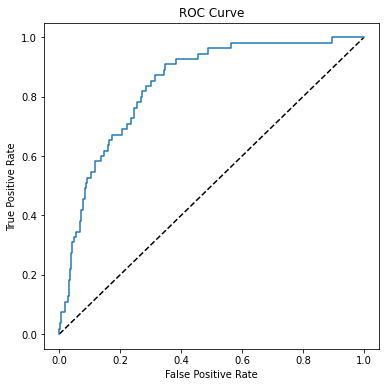


Mean Cross Validation
0.9574254956565111

Cross Validation Standard Deviation
0.0010830799419457816

Cross Validation
[0.95723014 0.95723014 0.95723014 0.95723014 0.95723014 0.95723014
 0.95519348 0.95723014 0.9592668  0.95918367]


['./models/preprocessing_logistic_regression_stroke_model.pkl']

In [41]:
# Create preprocessing and training pipeline
pre_op_pipe_lr_model, pre_op_pipe_lr_cv, pre_op_pipe_lr_cm_results = machine_learning_function(Pipeline(steps=[('preprocessor', preprocessor),('logregressor', LogisticRegression(C=1/0.01, solver="liblinear", random_state=0))]))

# Save the model as a pickle file
filename = './models/preprocessing_logistic_regression_stroke_model.pkl'
joblib.dump(pre_op_pipe_lr_model, filename)

## 12. Pre-Optimised Pipeline Random Forest Model

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1418
           1       0.20      0.02      0.03        55

    accuracy                           0.96      1473
   macro avg       0.58      0.51      0.51      1473
weighted avg       0.93      0.96      0.94      1473

Confusion Matrix:
 [[1414    4]
 [  54    1]] 

Accuracy: 0.9606245756958588
Overall Precision: 0.2
Overall Recall: 0.01818181818181818
AUC: 0.8045646877804846


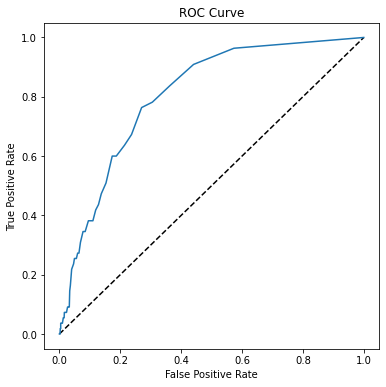


Mean Cross Validation
0.9562030840849578

Cross Validation Standard Deviation
0.0018731509694268852

Cross Validation
[0.95519348 0.95723014 0.95723014 0.9592668  0.95315682 0.95723014
 0.95315682 0.95519348 0.95723014 0.95714286]


['./models/preprocessing_random_forest_stroke_model.pkl']

In [42]:
# Create preprocessing and training pipeline
pre_op_pipe_rf_model, pre_op_pipe_rf_cv, pre_op_pipe_rf_cm_results = machine_learning_function(Pipeline(steps=[('preprocessor', preprocessor),('logregressor', RandomForestClassifier(random_state=0))]))

# Save the model as a pickle file
filename = './models/preprocessing_random_forest_stroke_model.pkl'
joblib.dump(pre_op_pipe_rf_model, filename)

## 13. Pre-Optimised Pipeline KNN Model

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1418
           1       0.22      0.04      0.06        55

    accuracy                           0.96      1473
   macro avg       0.59      0.52      0.52      1473
weighted avg       0.94      0.96      0.94      1473

Confusion Matrix:
 [[1411    7]
 [  53    2]] 

Accuracy: 0.9592668024439919
Overall Precision: 0.2222222222222222
Overall Recall: 0.03636363636363636
AUC: 0.6346647006026412


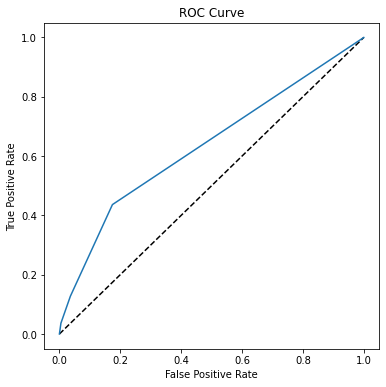


Mean Cross Validation
0.9555920861216176

Cross Validation Standard Deviation
0.0025383255437700274

Cross Validation
[0.95519348 0.95723014 0.95112016 0.95519348 0.95112016 0.95723014
 0.9592668  0.95519348 0.95723014 0.95714286]


['./models/preprocessing_knn_stroke_model.pkl']

In [43]:
pre_op_pipe_knn_model, pre_op_pipe_knn_cv, pre_op_pipe_knn_cm_results = machine_learning_function(Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', neighbors.KNeighborsClassifier(n_neighbors=5))]))

# Save the model as a pickle file
filename = './models/preprocessing_knn_stroke_model.pkl'
joblib.dump(pre_op_pipe_knn_model, filename)

## 14. Pre-Optimised Pipeline SVC Model

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1418
           1       0.00      0.00      0.00        55

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.93      0.96      0.94      1473

Confusion Matrix:
 [[1418    0]
 [  55    0]] 

Accuracy: 0.9626612355736592
Overall Precision: 0.0
Overall Recall: 0.0
AUC: 0.3867547121425824


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\

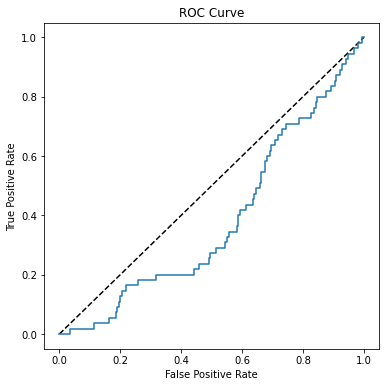


Mean Cross Validation
0.9574254956565111

Cross Validation Standard Deviation
0.0005860592709588829

Cross Validation
[0.95723014 0.95723014 0.95723014 0.95723014 0.95723014 0.95723014
 0.95723014 0.95723014 0.95723014 0.95918367]


['./models/preprocessing_svc_stroke_model.pkl']

In [44]:
pre_op_pipe_svc_model, pre_op_pipe_svc_cv, pre_op_pipe_svc_cm_results = machine_learning_function(Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', SVC(random_state=0, kernel = 'linear', probability=True))]))

# Save the model as a pickle file
filename = './models/preprocessing_svc_stroke_model.pkl'
joblib.dump(pre_op_pipe_svc_model, filename)

## 15. Optimised Logistic Regression Model

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.66      0.79      1418
           1       0.09      0.85      0.16        55

    accuracy                           0.66      1473
   macro avg       0.54      0.75      0.47      1473
weighted avg       0.96      0.66      0.77      1473

Confusion Matrix:
 [[929 489]
 [  8  47]] 

Accuracy: 0.6625933469110659
Overall Precision: 0.08768656716417911
Overall Recall: 0.8545454545454545
AUC: 0.8238107449673036


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


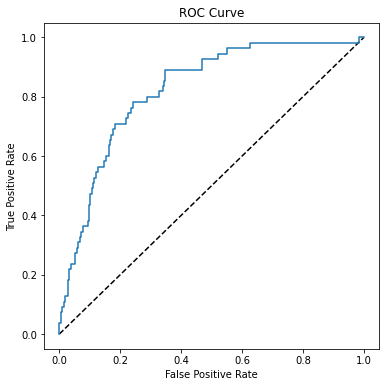

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not c


Mean Cross Validation
0.6673639802153042

Cross Validation Standard Deviation
0.2671478586324553

Cross Validation
[0.40325866 0.95723014 0.95723014 0.56619145 0.22403259 0.45417515
 0.95723014 0.44399185 0.95315682 0.75714286]

 Coefficients
[[-0.06544282  0.04222666  0.2789987   0.14080924 -0.0877885  -0.23628401
  -0.02120696  0.00271183 -0.05532376  0.01613161]]

 Intercept
[-0.37855933]


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


['./models/optimised_logistic_regression_stroke_model.pkl']

In [45]:
op_lr_model, op_lr_cv, op_lr_cm_results = machine_learning_function(LogisticRegression(C = 100, class_weight = 'balanced', dual = False, fit_intercept = True, intercept_scaling = 0.001, max_iter = 175, multi_class = 'multinomial', penalty = 'l2', solver = 'saga', tol = 1e-09, warm_start = True, random_state=0))
print('\n Coefficients')
print(op_lr_model.coef_)
print('\n Intercept')
print(op_lr_model.intercept_)

# Save the model as a pickle file
filename = './models/optimised_logistic_regression_stroke_model.pkl'
joblib.dump(op_lr_model, filename)

## 16. Optimised Random Forest Model

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1418
           1       0.11      0.16      0.13        55

    accuracy                           0.92      1473
   macro avg       0.54      0.56      0.54      1473
weighted avg       0.93      0.92      0.93      1473

Confusion Matrix:
 [[1345   73]
 [  46    9]] 

Accuracy: 0.9192124915139172
Overall Precision: 0.10975609756097561
Overall Recall: 0.16363636363636364
AUC: 0.5811386075137838


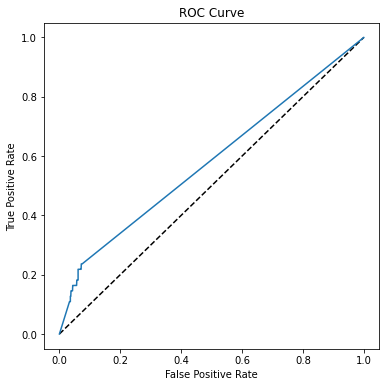


Mean Cross Validation
0.9181071532482648

Cross Validation Standard Deviation
0.010278514361432624

Cross Validation
[0.92260692 0.92464358 0.91038697 0.92668024 0.89613035 0.9287169
 0.91649695 0.9287169  0.92057026 0.90612245]


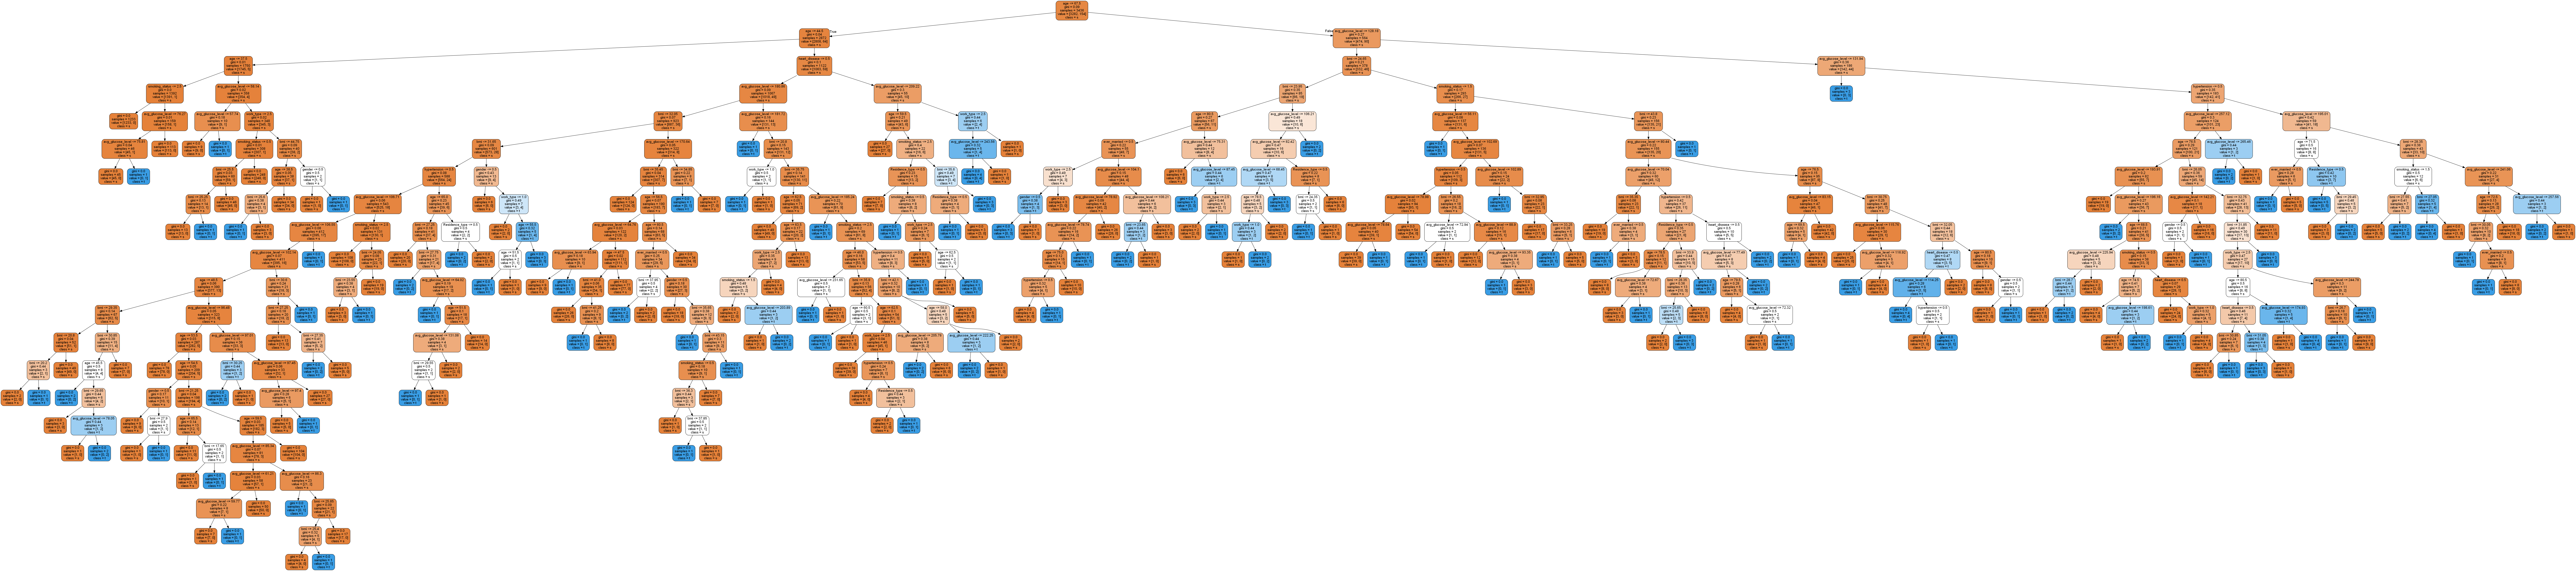

In [46]:
op_rf_model, op_rf_cv, op_rf_cm_results = machine_learning_function(RandomForestClassifier(bootstrap = False, max_depth = 20, max_features = 10, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 71, random_state=0))
estimator = op_rf_model.estimators_[1]

# Export tree as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = features,
                class_names = label,
                #label='root',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert dot file to png
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

# Save the model as a pickle file
filename = './models/optimised_random_forest_stroke_model.pkl'
joblib.dump(op_rf_model, filename)

# Display in jupyter notebook
Image(filename = 'tree.png')

## 17. Optimised KNN Model

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1418
           1       0.12      0.15      0.13        55

    accuracy                           0.93      1473
   macro avg       0.54      0.55      0.55      1473
weighted avg       0.94      0.93      0.93      1473

Confusion Matrix:
 [[1361   57]
 [  47    8]] 

Accuracy: 0.9293957909029192
Overall Precision: 0.12307692307692308
Overall Recall: 0.14545454545454545
AUC: 0.5526285421207847


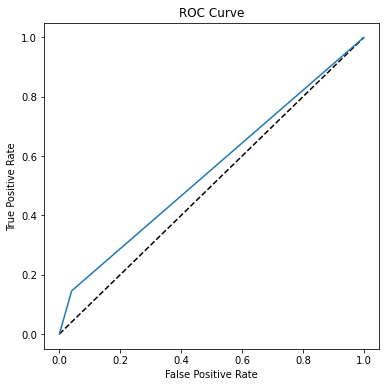


Mean Cross Validation
0.9272737852778586

Cross Validation Standard Deviation
0.008125905699069739

Cross Validation
[0.93279022 0.93279022 0.93686354 0.93686354 0.92260692 0.9287169
 0.91242363 0.9287169  0.92668024 0.91428571]


['./models/optimised_knn_stroke_model.pkl']

In [47]:
op_knn_model, op_knn_cv, op_knn_cm_results = machine_learning_function(neighbors.KNeighborsClassifier(algorithm = 'auto', leaf_size = 1, n_jobs = 1, n_neighbors = 1, p = 2, weights= 'uniform'))

# Save the model as a pickle file
filename = './models/optimised_knn_stroke_model.pkl'
joblib.dump(op_knn_model, filename)

## 17. Optimised SVC Model

[LibSVM]Classification Report
              precision    recall  f1-score   support

           0       1.00      0.45      0.62      1418
           1       0.06      0.98      0.12        55

    accuracy                           0.47      1473
   macro avg       0.53      0.71      0.37      1473
weighted avg       0.96      0.47      0.60      1473

Confusion Matrix:
 [[633 785]
 [  1  54]] 

Accuracy: 0.4663951120162933
Overall Precision: 0.06436233611442194
Overall Recall: 0.9818181818181818
AUC: 0.7625080138479292


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


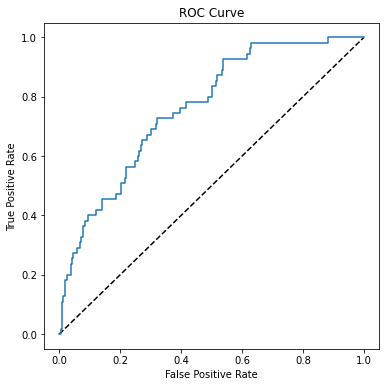

[LibSVM][LibSVM][LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
Mean Cross Validation
0.4014451972234922

Cross Validation Standard Deviation
0.2675012331685443

Cross Validation
[0.63747454 0.23421589 0.63136456 0.69450102 0.07331976 0.68839104
 0.16904277 0.11608961 0.67413442 0.09591837]


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\sv

['./models/optimised_svc_stroke_model.pkl']

In [48]:
op_svc_model, op_svc_cv, op_svc_cm_results = machine_learning_function(SVC(random_state=0, kernel = 'linear', probability=True, C= 0.1, break_ties = True, cache_size = 100, coef0 = 0, decision_function_shape = 'ovr', degree = 1, gamma = 'scale', max_iter = 3, shrinking = True, tol = 1e-05, verbose = True))

# Save the model as a pickle file
filename = './models/optimised_svc_stroke_model.pkl'
joblib.dump(op_svc_model, filename)

## 18. Optimised Pipeline Logistic Regression Model

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.72      0.84      1418
           1       0.10      0.84      0.19        55

    accuracy                           0.73      1473
   macro avg       0.55      0.78      0.51      1473
weighted avg       0.96      0.73      0.81      1473

Confusion Matrix:
 [[1024  394]
 [   9   46]] 

Accuracy: 0.7264086897488119
Overall Precision: 0.10454545454545454
Overall Recall: 0.8363636363636363
AUC: 0.8445954609565328


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


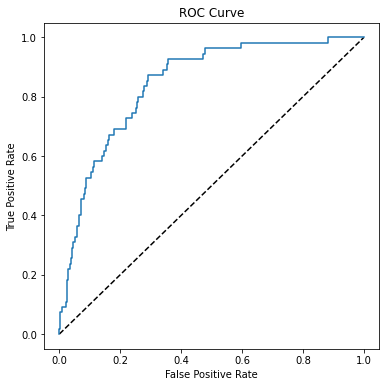

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not c


Mean Cross Validation
0.7421073195062139

Cross Validation Standard Deviation
0.024176634452365512

Cross Validation
[0.73523422 0.74541752 0.7209776  0.77800407 0.69450102 0.74949084
 0.72301426 0.74949084 0.77800407 0.74693878]


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


['./models/optimised_preprocessing_logistic_regression_stroke_model.pkl']

In [49]:
# Create preprocessing and training pipeline
op_pipe_lr_model, op_pipe_lr_cv, op_pipe_lr_cm_results = machine_learning_function(Pipeline(steps=[('preprocessor', preprocessor),('logregressor', LogisticRegression(C = 100, class_weight = 'balanced', dual = False, fit_intercept = True, intercept_scaling = 0.001, max_iter = 175, multi_class = 'multinomial', penalty = 'l2', solver = 'saga', tol = 1e-09, warm_start = True, random_state=0))]))

# Save the model as a pickle file
filename = './models/optimised_preprocessing_logistic_regression_stroke_model.pkl'
joblib.dump(op_pipe_lr_model, filename)

## 19. Optimised Pipeline Random Forest Model

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1418
           1       0.21      0.09      0.13        55

    accuracy                           0.95      1473
   macro avg       0.59      0.54      0.55      1473
weighted avg       0.94      0.95      0.94      1473

Confusion Matrix:
 [[1399   19]
 [  50    5]] 

Accuracy: 0.9531568228105907
Overall Precision: 0.20833333333333334
Overall Recall: 0.09090909090909091
AUC: 0.7472881138607514


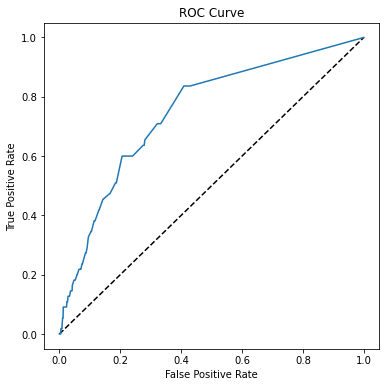


Mean Cross Validation
0.948053535059645

Cross Validation Standard Deviation
0.006401356877416294

Cross Validation
[0.9389002  0.95112016 0.94297352 0.95315682 0.95112016 0.95112016
 0.9389002  0.9592668  0.95112016 0.94285714]


['./models/optimised_preprocessing_random_forest_stroke_model.pkl']

In [50]:
# Create preprocessing and training pipeline
op_pipe_rf_model, op_pipe_rf_cv, op_pipe_rf_cm_results = machine_learning_function(Pipeline(steps=[('preprocessor', preprocessor),('logregressor', RandomForestClassifier(bootstrap = False, max_depth = 20, max_features = 10, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 71, random_state=0))]))

# Save the model as a pickle file
filename = './models/optimised_preprocessing_random_forest_stroke_model.pkl'
joblib.dump(op_pipe_rf_model, filename)

## 19. Optimised Pipeline KNN Model

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1418
           1       0.09      0.11      0.10        55

    accuracy                           0.93      1473
   macro avg       0.53      0.53      0.53      1473
weighted avg       0.93      0.93      0.93      1473

Confusion Matrix:
 [[1358   60]
 [  49    6]] 

Accuracy: 0.9260013577732519
Overall Precision: 0.09090909090909091
Overall Recall: 0.10909090909090909
AUC: 0.5333888960123093


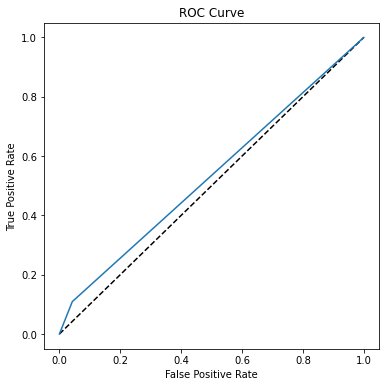


Mean Cross Validation
0.9274799451348767

Cross Validation Standard Deviation
0.006950462036010941

Cross Validation
[0.92464358 0.9185336  0.9185336  0.9389002  0.9185336  0.93279022
 0.93075356 0.93075356 0.93482688 0.92653061]


['./models/optimised_preprocessing_knn_stroke_model.pkl']

In [51]:
op_pipe_knn_model, op_pipe_knn_cv, op_pipe_knn_cm_results = machine_learning_function(Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', neighbors.KNeighborsClassifier(algorithm = 'auto', leaf_size = 1, n_jobs = 1, n_neighbors = 1, p = 2, weights= 'uniform'))]))

# Save the model as a pickle file
filename = './models/optimised_preprocessing_knn_stroke_model.pkl'
joblib.dump(op_pipe_knn_model, filename)

## 20. Optimised Pipeline SVC Model

[LibSVM]Classification Report
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1418
           1       0.04      1.00      0.07        55

    accuracy                           0.04      1473
   macro avg       0.52      0.50      0.04      1473
weighted avg       0.96      0.04      0.00      1473

Confusion Matrix:
 [[   1 1417]
 [   0   55]] 

Accuracy: 0.03801765105227427
Overall Precision: 0.03736413043478261
Overall Recall: 1.0
AUC: 0.7839338376714963


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


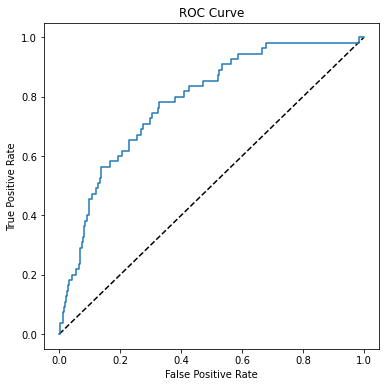

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\sv

[LibSVM][LibSVM][LibSVM][LibSVM]
Mean Cross Validation
0.3044087451681284

Cross Validation Standard Deviation
0.32681990513228965

Cross Validation
[0.04276986 0.04480652 0.88187373 0.04480652 0.63747454 0.04276986
 0.04276986 0.04276986 0.61710794 0.64693878]


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


['./models/optimised_preprocessing_svc_stroke_model.pkl']

In [52]:
op_pipe_svc_model, op_pipe_svc_cv, op_pipe_svc_cm_results = machine_learning_function(Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', SVC(random_state=0, kernel = 'linear', probability=True, C= 0.1, break_ties = True, cache_size = 100, coef0 = 0, decision_function_shape = 'ovr', degree = 1, gamma = 'scale', max_iter = 3, shrinking = True, tol = 1e-05, verbose = True))]))

# Save the model as a pickle file
filename = './models/optimised_preprocessing_svc_stroke_model.pkl'
joblib.dump(op_pipe_svc_model, filename)

## 21. Plot the Logistic Regression Pre-Optimised Coefficients VS Optimised Coefficients

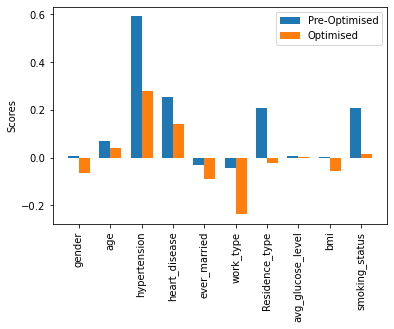

In [53]:
names = ('gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status')
pre = pre_op_lr_model.coef_[0]
post = op_lr_model.coef_[0]

N = len(names)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, pre, width, label='Pre-Optimised')
plt.bar(ind + width, post, width, label='Optimised')
plt.xticks(rotation=90)

plt.ylabel('Scores')

plt.xticks(ind + width / 2, names)
plt.legend(loc='best')
plt.show()

## 22. Pre-Optimised Ensemble Model

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1418
           1       0.00      0.00      0.00        55

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.93      0.96      0.94      1473

Confusion Matrix:
 [[1418    0]
 [  55    0]] 

Accuracy: 0.9626612355736592
Overall Precision: 0.0
Overall Recall: 0.0
AUC: 0.8287857417617642


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\

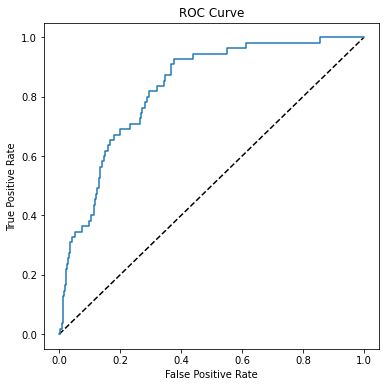


Mean Cross Validation
0.9574254956565111

Cross Validation Standard Deviation
0.0005860592709588829

Cross Validation
[0.95723014 0.95723014 0.95723014 0.95723014 0.95723014 0.95723014
 0.95723014 0.95723014 0.95723014 0.95918367]


['./models/pre_optimised_ensemble_stroke_model.pkl']

In [54]:
lr_model = LogisticRegression(C=1/0.01, solver="liblinear", random_state=0)
rf_model = RandomForestClassifier(random_state=0)
knn_model = neighbors.KNeighborsClassifier(n_neighbors=5)
svc_model = SVC(random_state=0, kernel = 'linear', probability=True)
pre_opt_ensemble_model, pre_opt_ensemble_cv, pre_opt_ensemble_cm_results = machine_learning_function(VotingClassifier(estimators=[
    ('lr', lr_model), ('rf', rf_model), ('knn', knn_model), ('svc', svc_model)], voting='soft'))

# Save the model as a pickle file
filename = './models/pre_optimised_ensemble_stroke_model.pkl'
joblib.dump(pre_opt_ensemble_model, filename)

## 23. Pre-Optimised Pipeline Ensemble Model

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1418
           1       0.00      0.00      0.00        55

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.93      0.96      0.94      1473

Confusion Matrix:
 [[1418    0]
 [  55    0]] 

Accuracy: 0.9626612355736592
Overall Precision: 0.0
Overall Recall: 0.0
AUC: 0.8190409026798308


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\

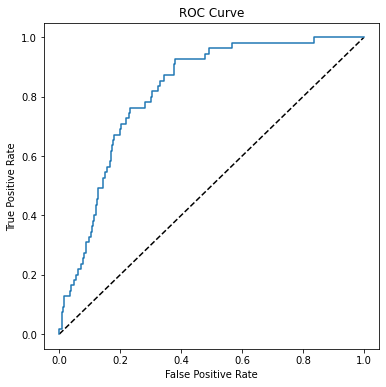


Mean Cross Validation
0.9574254956565111

Cross Validation Standard Deviation
0.0005860592709588829

Cross Validation
[0.95723014 0.95723014 0.95723014 0.95723014 0.95723014 0.95723014
 0.95723014 0.95723014 0.95723014 0.95918367]


['./models/pre_optimised_pipeline_ensemble_stroke_model.pkl']

In [55]:
pre_opt_pipe_ensemble_model, pre_opt_pipe_ensemble_cv, pre_opt_pipe_ensemble_cm_results = machine_learning_function(Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', VotingClassifier(estimators=[('lr', lr_model), ('rf', rf_model), ('knn', knn_model), ('svc', svc_model)], voting='soft'))]))

# Save the model as a pickle file
filename = './models/pre_optimised_pipeline_ensemble_stroke_model.pkl'
joblib.dump(pre_opt_ensemble_model, filename)

## 24. Optimised Ensemble Model

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1418
           1       0.24      0.15      0.18        55

    accuracy                           0.95      1473
   macro avg       0.60      0.56      0.58      1473
weighted avg       0.94      0.95      0.94      1473

Confusion Matrix:
 [[1392   26]
 [  47    8]] 

Accuracy: 0.9504412763068567
Overall Precision: 0.23529411764705882
Overall Recall: 0.14545454545454545
AUC: 0.8123733812027183


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


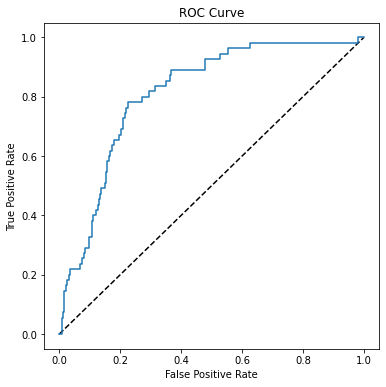

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]
Mean Cross Validation
0.9411272288956315

Cross Validation Standard Deviation
0.014845402821842123

Cross Validation
[0.93686354 0.95519348 0.9592668  0.9389002  0.90631365 0.93686354
 0.95315682 0.93482688 0.95519348 0.93469388]


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


['./models/optimised_ensemble_stroke_model.pkl']

In [56]:
opt_lr_model = LogisticRegression(C = 100, class_weight = 'balanced', dual = False, fit_intercept = True, intercept_scaling = 0.001, max_iter = 175, multi_class = 'multinomial', penalty = 'l2', solver = 'saga', tol = 1e-09, warm_start = True, random_state=0)
opt_rf_model = RandomForestClassifier(bootstrap = False, max_depth = 20, max_features = 10, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 71, random_state=0)
opt_knn_model = neighbors.KNeighborsClassifier(algorithm = 'auto', leaf_size = 1, n_jobs = 1, n_neighbors = 1, p = 2, weights= 'uniform')
opt_svc_model = SVC(random_state=0, kernel = 'linear', probability=True, C= 0.1, break_ties = True, cache_size = 100, coef0 = 0, decision_function_shape = 'ovr', degree = 1, gamma = 'scale', max_iter = 3, shrinking = True, tol = 1e-05, verbose = True)
opt_ensemble_model, opt_ensemble_cv, opt_ensemble_cm_results = machine_learning_function(VotingClassifier(estimators=[('lr', opt_lr_model), ('rf', opt_rf_model), ('knn', opt_knn_model), ('svc', opt_svc_model)], voting='soft'))

# Save the model as a pickle file
filename = './models/optimised_ensemble_stroke_model.pkl'
joblib.dump(opt_ensemble_model, filename)

## 25. Optimised Pipeline Ensemble Model

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]Classification Report


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1418
           1       0.17      0.09      0.12        55

    accuracy                           0.95      1473
   macro avg       0.57      0.54      0.55      1473
weighted avg       0.94      0.95      0.94      1473

Confusion Matrix:
 [[1393   25]
 [  50    5]] 

Accuracy: 0.9490835030549898
Overall Precision: 0.16666666666666666
Overall Recall: 0.09090909090909091
AUC: 0.8241569431978459


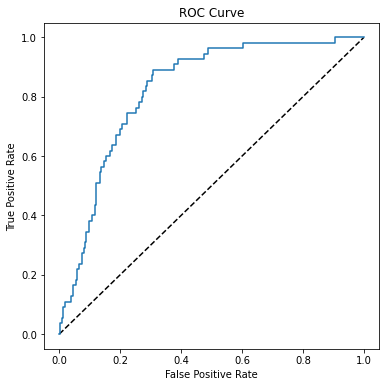

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[LibSVM]
Mean Cross Validation
0.9262616900120537

Cross Validation Standard Deviation
0.02197884279478251

Cross Validation
[0.89205703 0.90020367 0.9389002  0.91038697 0.93075356 0.90020367
 0.95315682 0.9490835  0.94297352 0.94489796]


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


['./models/pre_optimised_pipeline_ensemble_stroke_model.pkl']

In [57]:
opt_pipe_ensemble_model, opt_pipe_ensemble_cv, opt_pipe_ensemble_cm_results = machine_learning_function(Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', VotingClassifier(estimators=[('lr', opt_lr_model), ('rf', opt_rf_model), ('knn', opt_knn_model), ('svc', opt_svc_model)], voting='soft'))]))

# Save the model as a pickle file
filename = './models/pre_optimised_pipeline_ensemble_stroke_model.pkl'
joblib.dump(opt_pipe_ensemble_model, filename)

## 26. Plot the Ensemble Cross Validation Mean and Standard Deviation

In [58]:
def visualise_metrics(names, pre_var, pre_pipe_var, post_var, post_pipe_var, pre, pre_pipe, post, post_pipe):
    N = len(names)
    
    # Set number of independent variables
    ind = np.arange(N) 

    width = 0.2
    
    # Assign each independent variables' data 
    plt.bar(ind, pre, width, label='Pre-Optimised', yerr=pre_var)
    plt.bar(ind + width, pre_pipe, width, label='Pre-Optimised with Pipeline', yerr=pre_pipe_var)
    plt.bar(ind + 2 * width, post, width, label='Optimised', yerr=post_var)
    plt.bar(ind + 3 * width, post_pipe, width, label='Optimised with Pipeline', yerr=post_pipe_var)
    
    # Define axis
    plt.xticks(rotation=90)
    plt.ylabel('%')
    plt.xticks(ind + 1.5 * width, names)
    
    # Define legend
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.25), ncol=2)
    
    # Show graph
    plt.show()

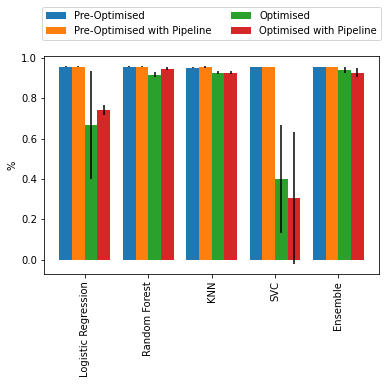

In [59]:
# Define independent variables
names = ('Logistic Regression', 'Random Forest', 'KNN', 'SVC', 'Ensemble')

# Define variance values
pre_var = [pre_op_lr_cv.std(), pre_op_rf_cv.std(), pre_op_knn_cv.std(), pre_op_svc_cv.std(), pre_opt_ensemble_cv.std()]
pre_pipe_var = [pre_op_pipe_lr_cv.std(), pre_op_pipe_rf_cv.std(), 
                pre_op_pipe_knn_cv.std(), pre_op_pipe_svc_cv.std(), pre_opt_pipe_ensemble_cv.std()]
post_var = [op_lr_cv.std(), op_rf_cv.std(), op_knn_cv.std(), 
            op_svc_cv.std(), opt_ensemble_cv.std()]
post_pipe_var = [op_pipe_lr_cv.std(), op_pipe_rf_cv.std(), 
                 op_pipe_knn_cv.std(), op_pipe_svc_cv.std(), opt_pipe_ensemble_cv.std()]

# Define the values to plot
pre = [pre_op_lr_cv.mean(), pre_op_rf_cv.mean(), pre_op_knn_cv.mean(), pre_op_svc_cv.mean(), pre_opt_ensemble_cv.mean()]
pre_pipe = [pre_op_pipe_lr_cv.mean(), pre_op_pipe_rf_cv.mean(), pre_op_pipe_knn_cv.mean(), 
            pre_op_pipe_svc_cv.mean(), pre_opt_pipe_ensemble_cv.mean()]
post = [op_lr_cv.mean(), op_rf_cv.mean(), op_knn_cv.mean(), 
        op_svc_cv.mean(), opt_ensemble_cv.mean()]
post_pipe = [op_pipe_lr_cv.mean(), op_pipe_rf_cv.mean(), op_pipe_knn_cv.mean(), 
             op_pipe_svc_cv.mean(), opt_pipe_ensemble_cv.mean()]


# Run function
visualise_metrics(names, pre_var, pre_pipe_var, post_var, post_pipe_var, pre, pre_pipe, post, post_pipe)

## 27. Plot the Models' Accuracy Scores

Accuracy Score


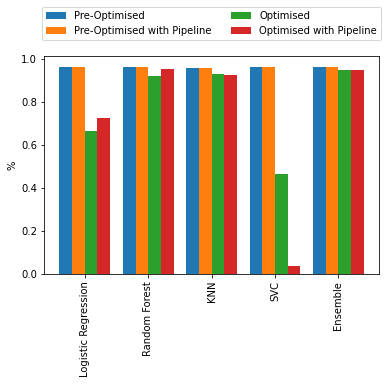

Precision Score


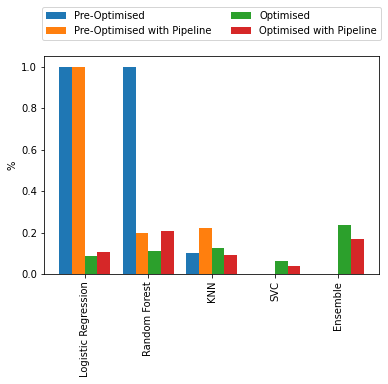

Recall Score


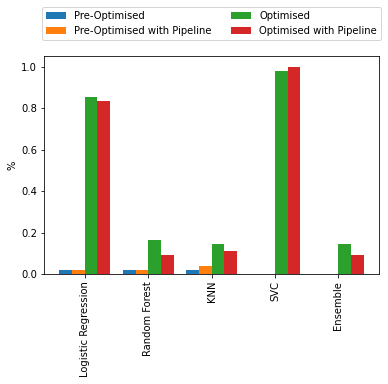

AUC Score


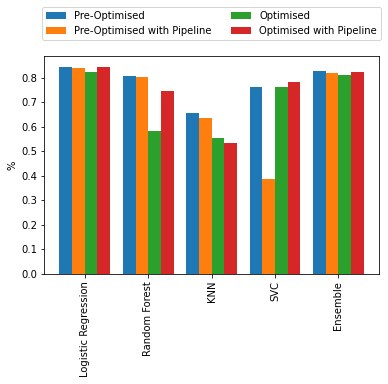

In [60]:
# Define independent variables
names = ('Logistic Regression', 'Random Forest', 'KNN', 'SVC', 'Ensemble')

# Define variance values
pre_var = [0,0,0,0,0]
pre_pipe_var = pre_var
post_var = pre_var
post_pipe_var = pre_var

for x in range(len(pre_op_lr_cm_results)):
    if x ==0:
        print("Accuracy Score")
    elif x ==1:
        print("Precision Score")
    elif x ==2:
        print("Recall Score")
    elif x ==3:
        print("AUC Score")
    
    # Define the values to plot
    pre = [pre_op_lr_cm_results[x], pre_op_rf_cm_results[x], pre_op_knn_cm_results[x], pre_op_svc_cm_results[x], pre_opt_ensemble_cm_results[x]]
    pre_pipe = [pre_op_pipe_lr_cm_results[x], pre_op_pipe_rf_cm_results[x], pre_op_pipe_knn_cm_results[x], pre_op_pipe_svc_cm_results[x], pre_opt_pipe_ensemble_cm_results[x]]
    post = [op_lr_cm_results[x], op_rf_cm_results[x], op_knn_cm_results[x], op_svc_cm_results[x], opt_ensemble_cm_results[x]]
    post_pipe = [op_pipe_lr_cm_results[x], op_pipe_rf_cm_results[x], op_pipe_knn_cm_results[x], op_pipe_svc_cm_results[x], opt_pipe_ensemble_cm_results[x]]

    # Run function
    visualise_metrics(names, pre_var, pre_pipe_var, post_var, post_pipe_var, pre, pre_pipe, post, post_pipe)